# Is seasonality a good predictor of implied volatility?

First, we need to define seasonality. We're going to create a "seasonality" parameter using a sine wave, mapping it's peak to June 30th and it's trough to January 1st.

In [98]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import timeit

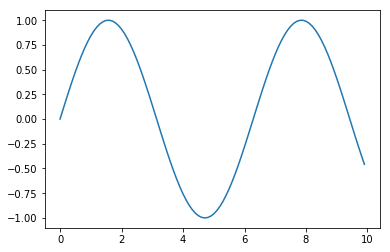

In [2]:
#plot basic sine wave
x = np.arange(0,10,.1)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [3]:
# double check function for max/min amplitude
print(np.sin(np.pi/2))
print(np.sin(-np.pi/2))

1.0
-1.0


In [4]:
# play with dates
sample_date = dt.date(2019,5,29)
sample_date2 = dt.date(2019,6,17)
print(sample_date)
year = sample_date.year
print(year)
print(dt.date(year,6,30))
x = (sample_date - sample_date2).days
print(abs(x))

2019-05-29
2019
2019-06-30
19


In [5]:
# define seasonality function we will be using
def date_season(date):
    year = date.year
    min_season = pd.datetime(year,1,1)
    max_season = pd.datetime(year,6,30)
    dif = abs(max_season - date)
    dif_days = dif.days
    x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
    seasonality = np.sin(x * (np.pi) / 2)
    return(seasonality)

In [6]:
# alternate seasonality function with python datetime type
def date_season2(date):
    year = date.year
    min_season = dt.date(year,1,1)
    max_season = dt.date(year,6,30)
    dif = abs(max_season - date)
    dif_days = dif.days
    x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
    seasonality = np.sin(x * (np.pi) / 2)
    return(seasonality)

In [7]:
# testing datetime functionality
#def date_season2(date):
date = dt.date(2019,3,15)
print(type(date))
year = date.year
print(type(year))
min_season = dt.date(year,1,1)
max_season = dt.date(year,6,30)
print(type(min_season))
print(type(max_season))
dif = abs(max_season - date)
print(type(dif))
dif_days = dif.days
print(type(dif_days))
x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
seasonality = np.sin(x * (np.pi) / 2)
print(seasonality)

<class 'datetime.date'>
<class 'int'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.timedelta'>
<class 'int'>
-0.2923717047227367


In [8]:
print(date_season(pd.datetime(2019,3,15)))
print(date_season(pd.datetime(2020,3,15)))
print(date_season(pd.datetime(2021,3,15)))

-0.2923717047227367
-0.2824894595585637
-0.2923717047227367


Now we need to map to calendar

In [9]:
# create pandas dataframe with a range of dates
start = dt.date(2017,1,1)
end = dt.date(2019,12,31)
df = pd.DataFrame({'Date': pd.date_range(start, end, freq="D")})

In [10]:
df.head(20)

,Date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
5,2017-01-06
6,2017-01-07
7,2017-01-08
8,2017-01-09
9,2017-01-10


In [11]:
# map seasonality parameter to the range of dates
# works because there is only one column in the df we previously created, 
# will throw an error if run twice
df['Seasonality'] = df.applymap(lambda x: date_season(x))

In [13]:
df.head(200)

,Date,Seasonality
0,2017-01-01,-1.000000
1,2017-01-02,-0.999848
2,2017-01-03,-0.999391
3,2017-01-04,-0.998630
4,2017-01-05,-0.997564
5,2017-01-06,-0.996195
6,2017-01-07,-0.994522
7,2017-01-08,-0.992546
8,2017-01-09,-0.990268
9,2017-01-10,-0.987688


In [14]:
print(df.iloc[9])

Date           2017-01-10 00:00:00
Seasonality              -0.987688
Name: 9, dtype: object


In [117]:
# error due to function not able to operate on a series
df['Seasonality'] = date_season(df.Date)

AttributeError: 'Series' object has no attribute 'year'

In [15]:
print(len(df))

1095


In [16]:
# alternate way to create a list of seasonalities and then combine with original df, not efficient
z = []
for index, row in df.iterrows():
    z.append(date_season(row.Date))
print(z)

[-1.0, -0.9998476951563913, -0.9993908270190958, -0.9986295347545738, -0.9975640502598242, -0.9961946980917455, -0.9945218953682733, -0.992546151641322, -0.9902680687415704, -0.9876883405951378, -0.984807753012208, -0.981627183447664, -0.9781476007338057, -0.9743700647852352, -0.9702957262759965, -0.9659258262890683, -0.9612616959383189, -0.9563047559630354, -0.9510565162951535, -0.9455185755993167, -0.9396926207859083, -0.9335804264972017, -0.9271838545667873, -0.9205048534524404, -0.9135454576426009, -0.9063077870366499, -0.898794046299167, -0.8910065241883678, -0.8829475928589269, -0.8746197071393957, -0.8660254037844386, -0.8571673007021122, -0.8480480961564261, -0.8386705679454239, -0.8290375725550417, -0.8191520442889918, -0.8090169943749475, -0.7986355100472928, -0.7880107536067219, -0.7771459614569708, -0.766044443118978, -0.7547095802227719, -0.7431448254773941, -0.7313537016191705, -0.7193398003386511, -0.7071067811865476, -0.6946583704589973, -0.6819983600624985, -0.66913060

### In the section below, we aggregate implied volatility data into a data frame.

In [17]:
# read in csv file with SF vol data
SF = pd.read_csv('C:/Users/Trader/Desktop/Dropbox/Data Science/DataSets/ImpVol/SFvol.csv', index_col=False)

In [18]:
SF.head(20)

,Observation Date,Year,Stat,Value
0,03/23/2009,2010,breakeven,0
1,03/23/2009,2010,call_strike,1140
2,03/23/2009,2010,Expiration Date,12/24/2009
3,03/23/2009,2010,exp_date0,12/24/2009
4,03/23/2009,2010,iv_m10,38.07999906328041
5,03/23/2009,2010,iv_m15,38.07999906328041
6,03/23/2009,2010,iv_m20,38.07999906328041
7,03/23/2009,2010,iv_m25,38.07999906328041
8,03/23/2009,2010,iv 5th Month,38.07999906328041
9,03/23/2009,2010,iv_p10,38.459999053680804


In [19]:
# check format of date in SF dataframe
print(type(SF.iloc[10,0]))

<class 'str'>


In [21]:
# create subset of SF data for testing
test = SF.head(20)

In [22]:
# checking pd.to_datetime method on the test dataframe created above,
# checking to see if we can convert the 'Observation Date' column from string to pandas datetime
# then apply the date_season function to that datetime and create a new column 'Seasonality'
test['Observation Date'] = pd.to_datetime(test['Observation Date'])
test['Seasonality'] = test.apply(lambda x: date_season(x['Observation Date']), axis=1)
test

C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Observation Date,Year,Stat,Value,Seasonality
0,2009-03-23,2010,breakeven,0,-0.156434
1,2009-03-23,2010,call_strike,1140,-0.156434
2,2009-03-23,2010,Expiration Date,12/24/2009,-0.156434
3,2009-03-23,2010,exp_date0,12/24/2009,-0.156434
4,2009-03-23,2010,iv_m10,38.07999906328041,-0.156434
5,2009-03-23,2010,iv_m15,38.07999906328041,-0.156434
6,2009-03-23,2010,iv_m20,38.07999906328041,-0.156434
7,2009-03-23,2010,iv_m25,38.07999906328041,-0.156434
8,2009-03-23,2010,iv 5th Month,38.07999906328041,-0.156434
9,2009-03-23,2010,iv_p10,38.459999053680804,-0.156434


In [23]:
# ideally something like this should work
#test['Observation Date'] = pd.to_datetime(test['Observation Date'])
#test['Seasonality'] = date_season(test['Observation Date'])
#test

In [24]:
# using the tested method above on the SF dataframe to create a 'Seasonality' dataframe
SF['Observation Date'] = pd.to_datetime(SF['Observation Date'])
SF['Seasonality'] = SF.apply(lambda x: date_season(x['Observation Date']), axis=1)
SF.head(20)

,Observation Date,Year,Stat,Value,Seasonality
0,2009-03-23,2010,breakeven,0,-0.156434
1,2009-03-23,2010,call_strike,1140,-0.156434
2,2009-03-23,2010,Expiration Date,12/24/2009,-0.156434
3,2009-03-23,2010,exp_date0,12/24/2009,-0.156434
4,2009-03-23,2010,iv_m10,38.07999906328041,-0.156434
5,2009-03-23,2010,iv_m15,38.07999906328041,-0.156434
6,2009-03-23,2010,iv_m20,38.07999906328041,-0.156434
7,2009-03-23,2010,iv_m25,38.07999906328041,-0.156434
8,2009-03-23,2010,iv 5th Month,38.07999906328041,-0.156434
9,2009-03-23,2010,iv_p10,38.459999053680804,-0.156434


In [25]:
# begin working on removing unnecessary data and addding a DTE column

In [26]:
SF.columns

Index(['Observation Date', 'Year', 'Stat', 'Value', 'Seasonality'], dtype='object')

In [27]:
# create two dataframes from SF, one with vols and one with expiration dates
# don't want to alter original dataframe, need to create a new one

SFvols = SF.loc[SF['Stat'] == 'result']
SFexp = SF.loc[SF['Stat'] == 'exp_date0']
#SFvols.rename(columns={'Year':'Exp Year'}, inplace=True)
SFvols.rename(columns={'Value':'Vol'}, inplace=True)
# doesn't work
# SFvols.rename(columns={ SFvols.columns[0]: "Date" }, inplace=True)
print(SFvols.head())
print(SFexp.head())

   Observation Date  Year    Stat          Vol  Seasonality
15       2009-03-23  2010  result  38.45999905    -0.156434
32       2009-03-24  2010  result   36.6599991    -0.139173
49       2009-03-25  2010  result  38.21999906    -0.121869
66       2009-03-26  2010  result  36.41999911    -0.104528
83       2009-03-27  2010  result  35.57999913    -0.087156
   Observation Date  Year       Stat       Value  Seasonality
3        2009-03-23  2010  exp_date0  12/24/2009    -0.156434
20       2009-03-24  2010  exp_date0  12/24/2009    -0.139173
37       2009-03-25  2010  exp_date0  12/24/2009    -0.121869
54       2009-03-26  2010  exp_date0  12/24/2009    -0.104528
71       2009-03-27  2010  exp_date0  12/24/2009    -0.087156


C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [78]:
# create truncated version of SFexp containing just the observation date and the expiry
# promote the 'Observation Date' column to the index of the dataframe

SFexp_trunc = SFexp[['Observation Date', 'Value']]
print(SFexp_trunc.head())
SFexp_trunc = SFexp_trunc.set_index('Observation Date')
print(SFexp_trunc.head())

   Observation Date       Value
3        2009-03-23  12/24/2009
20       2009-03-24  12/24/2009
37       2009-03-25  12/24/2009
54       2009-03-26  12/24/2009
71       2009-03-27  12/24/2009
                       Value
Observation Date            
2009-03-23        12/24/2009
2009-03-24        12/24/2009
2009-03-25        12/24/2009
2009-03-26        12/24/2009
2009-03-27        12/24/2009


In [29]:
# Join the truncated version to the SFvols df using 'Observation Date' as the index

SFvols_exp = SFvols.join(SFexp_trunc, on='Observation Date')
SFvols_exp.head()

,Observation Date,Year,Stat,Vol,Seasonality,Value
15,2009-03-23,2010,result,38.45999905,-0.156434,12/24/2009
32,2009-03-24,2010,result,36.6599991,-0.139173,12/24/2009
49,2009-03-25,2010,result,38.21999906,-0.121869,12/24/2009
66,2009-03-26,2010,result,36.41999911,-0.104528,12/24/2009
83,2009-03-27,2010,result,35.57999913,-0.087156,12/24/2009


In [30]:
# remove 'Stat' column and rename 'Value' to 'Expiry', could be moved up a few lines

del SFvols_exp['Stat']
SFvols_exp.rename(columns={'Value':'Expiry'}, inplace=True)

In [31]:
# convert the values in 'Expiry' column to pandas datetime format, currently in a string
# this prevents an error when we compare it to 'Observation Date' to get days to expiration
# returns a timedelta value in the DTE column

SFvols_exp['Expiry'] = pd.to_datetime(SFvols_exp['Expiry'])
SFvols_exp['DTE'] = SFvols_exp['Expiry'] - SFvols_exp['Observation Date']
SFvols_exp.head()

,Observation Date,Year,Vol,Seasonality,Expiry,DTE
15,2009-03-23,2010,38.45999905,-0.156434,2009-12-24,276 days
32,2009-03-24,2010,36.6599991,-0.139173,2009-12-24,275 days
49,2009-03-25,2010,38.21999906,-0.121869,2009-12-24,274 days
66,2009-03-26,2010,36.41999911,-0.104528,2009-12-24,273 days
83,2009-03-27,2010,35.57999913,-0.087156,2009-12-24,272 days


In [33]:
# check DTE type
print(type(SFvols_exp.iloc[20,5]))

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [51]:
# define the maximum and minimum days to expiration we want to have in our final df
# use a boolean to bring rows from our SFvols_exp df into the new SF_fronts df
# important to isolate each boolean comparison with parentheses
max_dte = pd.Timedelta(days=60)
min_dte = pd.Timedelta(days=5)
SF_fronts = SFvols_exp[(SFvols_exp['DTE'] <= max_dte) & (SFvols_exp['DTE'] > min_dte)]
SF_fronts.head()

,Observation Date,Year,Vol,Seasonality,Expiry,DTE
2582,2009-10-26,2010,31.45999923,-0.469472,2009-12-24,59 days
2599,2009-10-27,2010,29.27999929,-0.484810,2009-12-24,58 days
2616,2009-10-28,2010,28.6599993,-0.500000,2009-12-24,57 days
2633,2009-10-29,2010,29.49999928,-0.515038,2009-12-24,56 days
2650,2009-10-30,2010,28.5399993,-0.529919,2009-12-24,55 days


Now we have a dataframe with our January vols when they are less than 61 and greater than 5 days to expiration

In [139]:
# create custom function to wrap up data cleaning work on vol csv files

def front_vol_pull(csv, min_dte, max_dte, action=date_season, 
                   obs_id='Observation Date', new_col='Seasonality',
                   vol_id='result', title_id='Stat', exp_id='exp_date0', 
                   location='C:/Users/Trader/Desktop/Dropbox/Data Science/DataSets/ImpVol/'):
    df = pd.read_csv(location+csv, index_col=False)
    df[obs_id] = pd.to_datetime(df[obs_id])
    df[new_col] = df.apply(lambda x: action(x[obs_id]), axis=1)
    dfvols = df.loc[df[title_id] == vol_id]
    dfexp = df.loc[df[title_id] == exp_id]
    dfvols.rename(columns={'Value':'Vol'}, inplace=True)
    dfexp_trunc = dfexp[[obs_id, 'Value']]
    dfexp_trunc = dfexp_trunc.set_index(obs_id)
    dfvols_exp = dfvols.join(dfexp_trunc, on=obs_id)
    del dfvols_exp[title_id]
    dfvols_exp.rename(columns={'Value':'Expiry'}, inplace=True)
    dfvols_exp['Expiry'] = pd.to_datetime(dfvols_exp['Expiry'])
    dfvols_exp['DTE'] = dfvols_exp['Expiry'] - dfvols_exp[obs_id]
    max_dte = pd.Timedelta(days=max_dte)
    min_dte = pd.Timedelta(days=min_dte)
    df_fronts = dfvols_exp[(dfvols_exp['DTE'] <= max_dte) & (dfvols_exp['DTE'] > min_dte)]
    #df_fronts.set_index(obs_id, inplace=True)
    #print(df_fronts.head())
    return df_fronts
    

In [140]:
SHvol = front_vol_pull('SHvol.csv', 5, 60)

C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [141]:
print(SHvol[40:80])
print(len(SHvol))

     Observation Date  Year          Vol  Seasonality     Expiry     DTE
4231       2010-01-07  2010  28.95999929    -0.994522 2010-02-19 43 days
4248       2010-01-08  2010   28.5999993    -0.992546 2010-02-19 42 days
4265       2010-01-11  2010  27.63999933    -0.984808 2010-02-19 39 days
4282       2010-01-12  2010  26.79999935    -0.981627 2010-02-19 38 days
4299       2010-01-13  2010  25.01999939    -0.978148 2010-02-19 37 days
4316       2010-01-14  2010  24.53999941    -0.974370 2010-02-19 36 days
4333       2010-01-15  2010  23.23999944    -0.970296 2010-02-19 35 days
4350       2010-01-19  2010   24.9399994    -0.951057 2010-02-19 31 days
4367       2010-01-20  2010  25.79999937    -0.945519 2010-02-19 30 days
4384       2010-01-21  2010  26.39999936    -0.939693 2010-02-19 29 days
4401       2010-01-22  2010  26.15999936    -0.933580 2010-02-19 28 days
4418       2010-01-25  2010  24.95999939    -0.913545 2010-02-19 25 days
4435       2010-01-26  2010  21.15999949    -0.9063

From here, we want to use the custom front_vol_pull function on a list of csv files containing implied volatility data.

In [142]:
# create list of vol files

vol_files = ['SFvol.csv','SHvol.csv','SKvol.csv','SNvol.csv','SQvol.csv','SUvol.csv','SXvol.csv']
vol_dfs = {}

In [143]:
# need to create a dictionary for the appropriate max_dte values for each contract month
# complete this week

exp_to_dte = {'SFvol.csv':60, 'SHvol.csv':60}

In [144]:
# create dictionary with all cleaned vol files

tic = timeit.default_timer()

for i in vol_files:
    key = i[0:2] + 'vol'
    df = front_vol_pull(i,5,60)
    vol_dfs.update({key : df})
    
toc = timeit.default_timer()
print(toc-tic)

C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


67.3930949559981


In [145]:
print(vol_dfs)

{'SFvol':       Observation Date  Year          Vol  Seasonality     Expiry     DTE
2582        2009-10-26  2010  31.45999923    -0.469472 2009-12-24 59 days
2599        2009-10-27  2010  29.27999929    -0.484810 2009-12-24 58 days
2616        2009-10-28  2010   28.6599993    -0.500000 2009-12-24 57 days
2633        2009-10-29  2010  29.49999928    -0.515038 2009-12-24 56 days
2650        2009-10-30  2010   28.5399993    -0.529919 2009-12-24 55 days
2667        2009-11-02  2010   28.6199993    -0.573576 2009-12-24 52 days
2684        2009-11-03  2010  31.53999923    -0.587785 2009-12-24 51 days
2701        2009-11-04  2010  30.35999926    -0.601815 2009-12-24 50 days
2718        2009-11-05  2010  28.23999931    -0.615661 2009-12-24 49 days
2735        2009-11-06  2010  28.35999931    -0.629320 2009-12-24 48 days
2752        2009-11-09  2010  28.97999929    -0.669131 2009-12-24 45 days
2769        2009-11-10  2010  26.77999935    -0.681998 2009-12-24 44 days
2786        2009-11-11  2010

In [146]:
# create one large df with all data

full_data_set = pd.DataFrame()

tic = timeit.default_timer()

for i in vol_files:
    df = front_vol_pull(i,5,60)
    full_data_set = full_data_set.append(df)
    
toc = timeit.default_timer()
print(toc-tic)


C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


66.329395277


In [147]:
full_data_set.head(200)
print(len(full_data_set))

2733


In [148]:
print(full_data_set)

      Observation Date  Year          Vol  Seasonality     Expiry     DTE
2582        2009-10-26  2010  31.45999923    -0.469472 2009-12-24 59 days
2599        2009-10-27  2010  29.27999929    -0.484810 2009-12-24 58 days
2616        2009-10-28  2010   28.6599993    -0.500000 2009-12-24 57 days
2633        2009-10-29  2010  29.49999928    -0.515038 2009-12-24 56 days
2650        2009-10-30  2010   28.5399993    -0.529919 2009-12-24 55 days
2667        2009-11-02  2010   28.6199993    -0.573576 2009-12-24 52 days
2684        2009-11-03  2010  31.53999923    -0.587785 2009-12-24 51 days
2701        2009-11-04  2010  30.35999926    -0.601815 2009-12-24 50 days
2718        2009-11-05  2010  28.23999931    -0.615661 2009-12-24 49 days
2735        2009-11-06  2010  28.35999931    -0.629320 2009-12-24 48 days
2752        2009-11-09  2010  28.97999929    -0.669131 2009-12-24 45 days
2769        2009-11-10  2010  26.77999935    -0.681998 2009-12-24 44 days
2786        2009-11-11  2010  27.85999

In [149]:
# sort full_data_set based on Observation Date
# can be combined into function?

full_data_set = full_data_set.sort_values('Observation Date')

In [150]:
print(full_data_set)

      Observation Date  Year          Vol  Seasonality     Expiry     DTE
15          2009-01-02  2009  41.43999898    -0.999848 2009-02-20 49 days
32          2009-01-05  2009  41.93999897    -0.997564 2009-02-20 46 days
49          2009-01-06  2009  43.05999894    -0.996195 2009-02-20 45 days
66          2009-01-07  2009  42.17999896    -0.994522 2009-02-20 44 days
83          2009-01-08  2009    40.659999    -0.992546 2009-02-20 43 days
100         2009-01-09  2009  43.25999893    -0.990268 2009-02-20 42 days
117         2009-01-12  2009  43.77999892    -0.981627 2009-02-20 39 days
134         2009-01-13  2009  44.03999891    -0.978148 2009-02-20 38 days
151         2009-01-14  2009  42.99999894    -0.974370 2009-02-20 37 days
168         2009-01-15  2009  45.55999887    -0.970296 2009-02-20 36 days
185         2009-01-16  2009  45.95999886    -0.965926 2009-02-20 35 days
202         2009-01-20  2009  46.53999885    -0.945519 2009-02-20 31 days
219         2009-01-21  2009  45.51999

In [151]:
# drop rows that are expiring in 2020

clean_set = full_data_set[full_data_set['Year'] != 2020]

In [196]:
print(clean_set[80:101])

     Observation Date  Year          Vol  Seasonality     Expiry     DTE  \
1511       2009-05-12  2009  38.11999906     0.656059 2009-06-26 45 days   
1528       2009-05-13  2009  37.65999907     0.669131 2009-06-26 44 days   
1545       2009-05-14  2009  39.07999904     0.681998 2009-06-26 43 days   
1562       2009-05-15  2009  37.59999908     0.694658 2009-06-26 42 days   
1579       2009-05-18  2009  39.83999902     0.731354 2009-06-26 39 days   
1596       2009-05-19  2009  42.23999896     0.743145 2009-06-26 38 days   
1613       2009-05-20  2009  44.21999891     0.754710 2009-06-26 37 days   
1630       2009-05-21  2009  42.31999896     0.766044 2009-06-26 36 days   
1647       2009-05-22  2009  41.43999898     0.777146 2009-06-26 35 days   
1664       2009-05-26  2009  41.25999898     0.819152 2009-06-26 31 days   
1239       2009-05-26  2009  45.75999887     0.819152 2009-07-24 59 days   
1681       2009-05-27  2009  38.23999906     0.829038 2009-06-26 30 days   
1256       2

In [159]:
print(type(clean_set.iloc[10,0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [174]:
clean_set['dup'] = clean_set['Observation Date'] == clean_set['Observation Date'].shift()
clean_set['dup1'] = clean_set['Observation Date'] == clean_set['Observation Date'].shift(-1)
clean_set['duplicate'] = (clean_set['dup'] == True) | (clean_set['dup1'] == True)
del clean_set['dup']
del clean_set['dup1']

C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [177]:
clean_set.head(110)

,Observation Date,Year,Vol,Seasonality,Expiry,DTE,duplicate
15,2009-01-02,2009,41.43999898,-0.999848,2009-02-20,49 days,False
32,2009-01-05,2009,41.93999897,-0.997564,2009-02-20,46 days,False
49,2009-01-06,2009,43.05999894,-0.996195,2009-02-20,45 days,False
66,2009-01-07,2009,42.17999896,-0.994522,2009-02-20,44 days,False
83,2009-01-08,2009,40.659999,-0.992546,2009-02-20,43 days,False
100,2009-01-09,2009,43.25999893,-0.990268,2009-02-20,42 days,False
117,2009-01-12,2009,43.77999892,-0.981627,2009-02-20,39 days,False
134,2009-01-13,2009,44.03999891,-0.978148,2009-02-20,38 days,False
151,2009-01-14,2009,42.99999894,-0.974370,2009-02-20,37 days,False
168,2009-01-15,2009,45.55999887,-0.970296,2009-02-20,36 days,False


In [194]:
clean_set['vol1'] = (clean_set['Observation Date'] == clean_set['Observation Date'].shift()) * clean_set['Vol']
clean_set['vol2'] = (clean_set['Observation Date'] == clean_set['Observation Date'].shift(-1)) * clean_set['Vol']
clean_set[vol1]

C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [195]:
clean_set.head(110)

,Observation Date,Year,Vol,Seasonality,Expiry,DTE,duplicate,vol1,vol2
15,2009-01-02,2009,41.43999898,-0.999848,2009-02-20,49 days,False,,
32,2009-01-05,2009,41.93999897,-0.997564,2009-02-20,46 days,False,,
49,2009-01-06,2009,43.05999894,-0.996195,2009-02-20,45 days,False,,
66,2009-01-07,2009,42.17999896,-0.994522,2009-02-20,44 days,False,,
83,2009-01-08,2009,40.659999,-0.992546,2009-02-20,43 days,False,,
100,2009-01-09,2009,43.25999893,-0.990268,2009-02-20,42 days,False,,
117,2009-01-12,2009,43.77999892,-0.981627,2009-02-20,39 days,False,,
134,2009-01-13,2009,44.03999891,-0.978148,2009-02-20,38 days,False,,
151,2009-01-14,2009,42.99999894,-0.974370,2009-02-20,37 days,False,,
168,2009-01-15,2009,45.55999887,-0.970296,2009-02-20,36 days,False,,


In [197]:
del clean_set['vol1']
del clean_set['vol2']

In [215]:
print(clean_set[80:100])

     Observation Date  Year  Vol  Seasonality     Expiry     DTE  duplicate
1511       2009-05-12  2009  NaN     0.656059 2009-06-26 45 days      False
1528       2009-05-13  2009  NaN     0.669131 2009-06-26 44 days      False
1545       2009-05-14  2009  NaN     0.681998 2009-06-26 43 days      False
1562       2009-05-15  2009  NaN     0.694658 2009-06-26 42 days      False
1579       2009-05-18  2009  NaN     0.731354 2009-06-26 39 days      False
1596       2009-05-19  2009  NaN     0.743145 2009-06-26 38 days      False
1613       2009-05-20  2009  NaN     0.754710 2009-06-26 37 days      False
1630       2009-05-21  2009  NaN     0.766044 2009-06-26 36 days      False
1647       2009-05-22  2009  NaN     0.777146 2009-06-26 35 days      False
1664       2009-05-26  2009  NaN     0.819152 2009-06-26 31 days       True
1239       2009-05-26  2009  NaN     0.819152 2009-07-24 59 days       True
1681       2009-05-27  2009  NaN     0.829038 2009-06-26 30 days       True
1256       2

In [217]:
clean_set['Vol'] =  clean_set['Vol'].astype(float)

C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


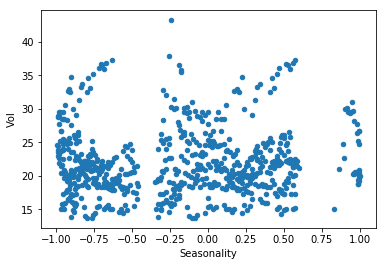

In [218]:
clean_set.plot.scatter(x='Seasonality', y='Vol')

In [219]:
clean_set.head()

,Observation Date,Year,Vol,Seasonality,Expiry,DTE,duplicate
15,2009-01-02,2009,NaN,-0.999848,2009-02-20,49 days,False
32,2009-01-05,2009,NaN,-0.997564,2009-02-20,46 days,False
49,2009-01-06,2009,NaN,-0.996195,2009-02-20,45 days,False
66,2009-01-07,2009,NaN,-0.994522,2009-02-20,44 days,False
83,2009-01-08,2009,NaN,-0.992546,2009-02-20,43 days,False


## Converting calendar day to business day 

In [ ]:
start = dt.date(2014,1,1)
end = dt.date(2014,1,16)

days = np.busday_count(start,end)
print(days)